In [32]:
import numpy as np
import pymc3 as pm
from scipy import stats
import matplotlib.pyplot as plt
'''合成数据'''
#每组采样总数
n_samples = [30, 30, 30]
#每组合格的采样值
g_samples0 = [18, 18, 18]
g_samples1 = [3, 3, 3]
g_samples2 = [18, 3, 3]
alist = [g_samples0, g_samples1, g_samples2]

group_idx = np.repeat(np.arange(len(n_samples)), n_samples)

[[18, 18, 18], [3, 3, 3], [18, 3, 3]]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, beta, alpha]
100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:08<00:00, 300.84it/s]
There were 48 divergences after tuning. Increase `target_accept` or reparameterize.
There were 316 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.710121556342802, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, beta, alpha]
100%|██████████████████████████████████████████████████████████████████████

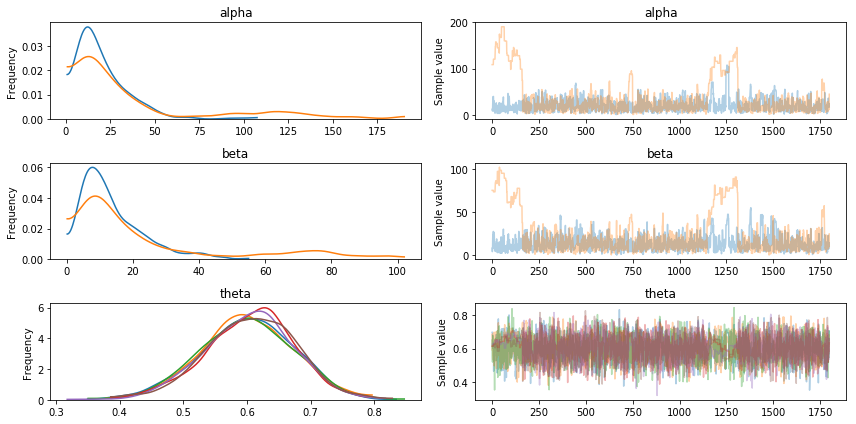

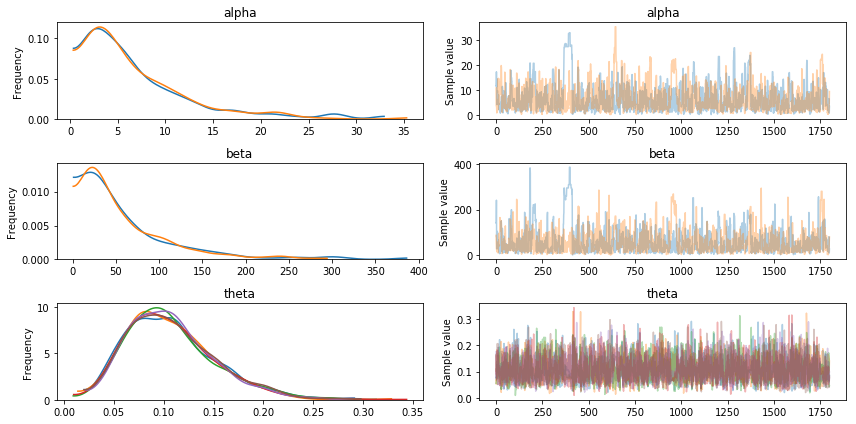

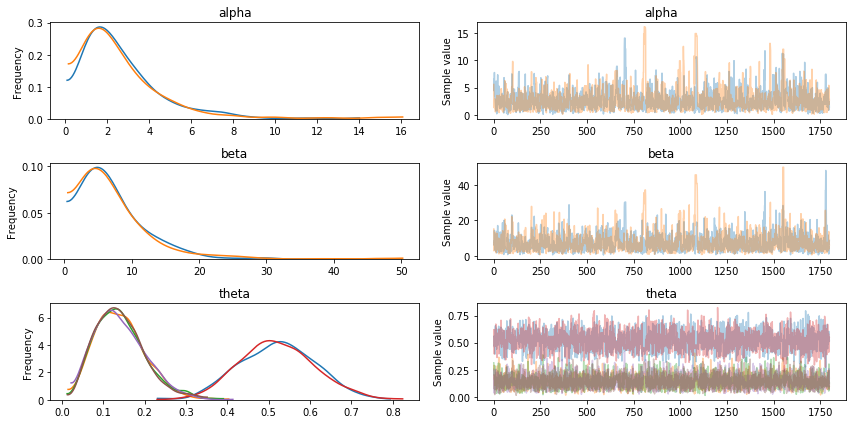

In [34]:
'''模型设置'''
for i in range(3):
    g_samples = alist[i]
    data = []
    for i in range(0, len(n_samples)):
    #高于标准值记为0，低于标准值记为1
        data.extend(np.repeat([1, 0], [g_samples[i], n_samples[i]-g_samples[i]]))
    with pm.Model() as model_h:
        alpha = pm.HalfCauchy('alpha', beta=10)
        beta = pm.HalfCauchy('beta', beta=10)

        theta = pm.Beta('theta', alpha, beta, shape=len(n_samples))

        y = pm.Bernoulli('y', p=theta[group_idx], observed=data)

        trace_j = pm.sample(2000, cores=1)
    
    chain_h = trace_j[200:]
    pm.traceplot(chain_h)

Text(0.5, 0, '$\\theta_{prior}$')

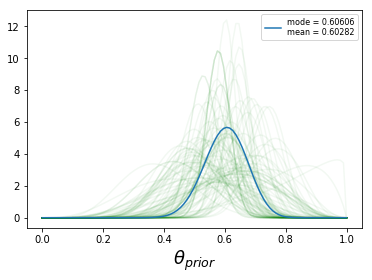

In [23]:
x = np.linspace(0, 1, 100)
for i in np.random.randint(0, len(chain_h), size=100):
    pdf = stats.beta(chain_h['alpha'][i], chain_h['beta'][i]).pdf(x)
    plt.plot(x, pdf, 'g', alpha=0.05)
    
dist = stats.beta(chain_h['alpha'].mean(), chain_h['beta'].mean())
pdf = dist.pdf(x)
mode = x[np.argmax(pdf)]
mean = dist.moment(1)
plt.plot(x, pdf, label='mode = {:.5f}\nmean = {:.5f}'.format(mode, mean))

plt.legend(fontsize=8)
plt.xlabel(r'$\theta_{prior}$', fontsize=18)